In [1]:

import numpy as np
import matplotlib.pyplot as plt
from Class import *

In [2]:

def simulate(data,Grids_:Grids,Lymph:Lymph_node,time,activation):
    '''A customizable method to simulate once. It controls what data you're collecting.'''
    grids_list=Grids_.get_list()
    for t in range(time): #Set max time limit
        for grid in grids_list:
            grid.update(Grids_)
        Grids_.virtual_grid.update_anti()
        Lymph.update(Grids_,activation)
        dist=Grids_.cancer_distribution() #Get cancer feature distribution
        antidist=Grids_.sample_antibody_dist() #This gives antibody distribution sample
        if len(dist)>1:
            cov_matrix = np.cov(dist, rowvar=False)  # Calculates the variance of all the cancer features
            spatial_variance_trace = cov_matrix[0, 0] + cov_matrix[1, 1]
        else: spatial_variance_trace=0
        print("Time",Grids_.time,"Cancer:",Grids_.cancer_n,"; Antibody:",Lymph.new_anti) #Print live status update
        new_data=[Grids_.cancer_n,Lymph.new_anti,spatial_variance_trace ] #This controls what data you're collecting
        for i in range(len(new_data)): 
            data[i].append(new_data[i])
        if Grids_.cancer_n>2000 or Grids_.cancer_n==0: return Grids_,data #Termination condition
        Grids_.time+=1
    return Grids_,data
    

# Usage example

In [3]:
c_mut_p=0.55 # set mutation rate

feature_d=2 # Set feature dimension

activation="B" #Set mode of immune activation. There are B, TN, DN, N. Broad, triple narrow, double narrow, narrow.

antibody_inactive_time=4 #Time before antibody become active after it is diffused
antibody_active_time=150 #unit time before antibody disappear.
effectiveness=6 #Effectiveness exponent coefficient
physical_scale=40 #nxnxn
cancer_cord=[]
for i in range(4): #Generate the initial coordinates for the initial cancer batch. 
    for o in range(4):
        for j in range(4):
            cancer_cord.append((i,o,j))
cancer_feature=Feature((1,1,1,1)[:feature_d]) # A random feature to assign to the initial batch of cancer. Truncated to the feature dimension
time=150 #Max simulation time
c_rep=0.4 #Cancer replication rate
match_rate:float=1/50 #Match rate

data=[[],[],[],[]] #cancer count, new antibody,cancer dist, Antibody Distribution. To collect data
Grids_=Grids(physical_scale,cancer_cord,cancer_feature,c_mut_p,c_rep)
Lymph=Lymph_node(match_rate,antibody_inactive_time,effectiveness)
grids_,data=simulate(data,Grids_,Lymph,time,activation)


Time 0 Cancer: 67 ; Antibody: 0
Time 1 Cancer: 70 ; Antibody: 0
Time 2 Cancer: 78 ; Antibody: 0
Time 3 Cancer: 84 ; Antibody: 0
Time 4 Cancer: 90 ; Antibody: 0
Time 5 Cancer: 100 ; Antibody: 0
Time 6 Cancer: 106 ; Antibody: 0
Time 7 Cancer: 118 ; Antibody: 0
Time 8 Cancer: 127 ; Antibody: 0
Time 9 Cancer: 139 ; Antibody: 0
Time 10 Cancer: 148 ; Antibody: 0
Time 11 Cancer: 160 ; Antibody: 0
Time 12 Cancer: 174 ; Antibody: 0
Time 13 Cancer: 194 ; Antibody: 0
Time 14 Cancer: 208 ; Antibody: 0
Time 15 Cancer: 230 ; Antibody: 0
Time 16 Cancer: 251 ; Antibody: 0
Time 17 Cancer: 277 ; Antibody: 0
Time 18 Cancer: 303 ; Antibody: 0
Time 19 Cancer: 323 ; Antibody: 25
Time 20 Cancer: 342 ; Antibody: 10
Time 21 Cancer: 369 ; Antibody: 6
Time 22 Cancer: 391 ; Antibody: 11
Time 23 Cancer: 421 ; Antibody: 6
Time 24 Cancer: 453 ; Antibody: 25
Time 25 Cancer: 264 ; Antibody: 15
Time 26 Cancer: 215 ; Antibody: 9
Time 27 Cancer: 210 ; Antibody: 9
Time 28 Cancer: 224 ; Antibody: 8
Time 29 Cancer: 234 ; An

Text(0.5, 1.0, 'Cancer count')

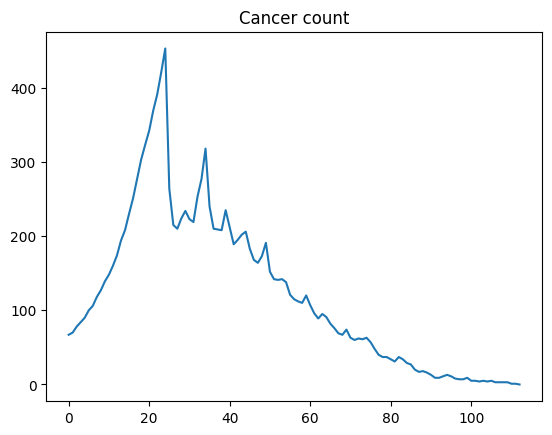

In [4]:
data_=data[0]# Visualize cancer count
plt.plot(range(len(data_)),data_)
plt.title("Cancer count")